# Exploratory Data Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("cleaned_dataset.csv")

df

,Unnamed: 0,State,Agency Type,City,Population1,Crimes Against Persons,Crimes Against Property,Crimes Against Society,Crimes Against Persons.1,Kidnapping/ Abduction,...,Burglary/ Breaking & Entering,Destruction/ Damage/ Vandalism,Fraud Offenses,Credit Card/ Automated Teller Machine Fraud,Theft From Building,Motor Vehicle Theft,Robbery,Stolen Property Offenses,Drug/ Narcotic Violations,Weapon Law Violations
0,0,ALABAMA,Cities,Hoover,82332.0,899,2880.0,525.0,870,2.0,...,391.0,280.0,202.0,109.0,410.0,88.0,46.0,29.0,339.0,26.0
1,1,ARIZONA,Cities,Apache Junction,36986.0,611,1748.0,334.0,559,14.0,...,237.0,447.0,162.0,62.0,12.0,68.0,21.0,28.0,152.0,25.0
2,2,ARIZONA,Cities,Gilbert,214264.0,"1,396",6610.0,2160.0,"1,242",54.0,...,728.0,2303.0,486.0,150.0,96.0,171.0,59.0,100.0,979.0,75.0
3,3,ARIZONA,Metropolitan Counties,Yuma2,5227.0,661,1890.0,484.0,555,17.0,...,363.0,542.0,192.0,48.0,13.0,75.0,10.0,24.0,208.0,40.0
4,4,ARKANSAS,Cities,Alma,5439.0,202,507.0,71.0,197,1.0,...,99.0,97.0,13.0,10.0,39.0,7.0,1.0,9.0,44.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,5230,WISCONSIN,Nonmetropolitan Counties,Sauk,5227.0,134,925.0,206.0,80,3.0,...,117.0,283.0,76.0,20.0,110.0,25.0,2.0,4.0,95.0,10.0
5231,5231,WISCONSIN,Nonmetropolitan Counties,Sawyer,5227.0,88,589.0,73.0,79,2.0,...,152.0,208.0,32.0,12.0,29.0,11.0,1.0,2.0,32.0,15.0
5232,5232,WISCONSIN,Nonmetropolitan Counties,Vilas,5227.0,55,257.0,62.0,42,2.0,...,52.0,68.0,24.0,5.0,13.0,6.0,1.0,3.0,49.0,13.0
5233,5233,WISCONSIN,Other Agencies - Tribal,Oneida Tribal,5227.0,64,191.0,95.0,56,1.0,...,26.0,74.0,5.0,3.0,12.0,5.0,3.0,3.0,57.0,3.0


In [17]:
# find the states that have most population 

totalpo = df.groupby("State")["Population1"].sum().reset_index()

sorted_states = totalpo.sort_values(by='Population1', ascending=False).reset_index()

new_df = sorted_states.head(5)

states = list(new_df["State"])

populations = new_df["Population1"]

new_df

,index,State,Population1
0,14,MICHIGAN,6489199.0
1,13,MASSACHUSETTS,5487042.0
2,27,TENNESSEE,4620632.0
3,21,OHIO,4349459.0
4,31,VIRGINIA,4348912.0


In [30]:
# Define a function to conditionally convert values

def convert_to_numeric(value):
    if isinstance(value, (int, float)):
        return value  # Leave existing numeric values as they are
    elif isinstance(value, str):
        # Remove commas and convert to float
        return float(value.replace(',', ''))
    else:
        return value  # Return other types as they are

    
df['Crimes Against Persons'] = df['Crimes Against Persons'].apply(convert_to_numeric)



In [63]:
# Find the total Crimes Against Persons ,Crimes Against Property and Crimes Against Society numbers of these states

col_kep = ["State","Population1" ,"Crimes Against Persons","Crimes Against Property","Crimes Against Society"]

fdf = df[col_kep]

fdf

,State,Population1,Crimes Against Persons,Crimes Against Property,Crimes Against Society
0,ALABAMA,82332.0,899.0,2880.0,525.0
1,ARIZONA,36986.0,611.0,1748.0,334.0
2,ARIZONA,214264.0,1396.0,6610.0,2160.0
3,ARIZONA,5227.0,661.0,1890.0,484.0
4,ARKANSAS,5439.0,202.0,507.0,71.0
...,...,...,...,...,...
5230,WISCONSIN,5227.0,134.0,925.0,206.0
5231,WISCONSIN,5227.0,88.0,589.0,73.0
5232,WISCONSIN,5227.0,55.0,257.0,62.0
5233,WISCONSIN,5227.0,64.0,191.0,95.0


In [64]:
dta = fdf.groupby("State")[["Population1","Crimes Against Persons",
                            "Crimes Against Property","Crimes Against Society"]].sum().reset_index()

dta

,State,Population1,Crimes Against Persons,Crimes Against Property,Crimes Against Society
0,ALABAMA,82332.0,899.0,2880.0,525.0
1,ARIZONA,256477.0,2668.0,10248.0,2978.0
2,ARKANSAS,2011352.0,57779.0,151538.0,21398.0
3,COLORADO,4061310.0,46890.0,208939.0,36858.0
4,CONNECTICUT,2101042.0,26768.0,73461.0,13915.0
5,DELAWARE,355992.0,22131.0,58542.0,12270.0
6,DISTRICT OF COLUMBIA,5227.0,731.0,2491.0,242.0
7,IDAHO,1167004.0,17375.0,47174.0,16066.0
8,ILLINOIS,152293.0,6170.0,13737.0,1490.0
9,IOWA,2283645.0,28799.0,99177.0,19825.0


In [82]:
std = dta.sort_values(by='Population1', ascending=False).reset_index()
std

,index,State,Population1,Crimes Against Persons,Crimes Against Property,Crimes Against Society
0,14,MICHIGAN,6489199.0,141011.0,324831.0,55679.0
1,13,MASSACHUSETTS,5487042.0,68236.0,185852.0,15275.0
2,27,TENNESSEE,4620632.0,154889.0,302217.0,78632.0
3,21,OHIO,4349459.0,104002.0,281434.0,47984.0
4,31,VIRGINIA,4348912.0,110816.0,289442.0,65012.0
5,3,COLORADO,4061310.0,46890.0,208939.0,36858.0
6,11,KENTUCKY,3181119.0,31510.0,116390.0,29802.0
7,32,WASHINGTON,2781666.0,50949.0,222546.0,23872.0
8,28,TEXAS,2772346.0,40826.0,132019.0,23598.0
9,9,IOWA,2283645.0,28799.0,99177.0,19825.0


# Comparison of Crimes for States (2012)

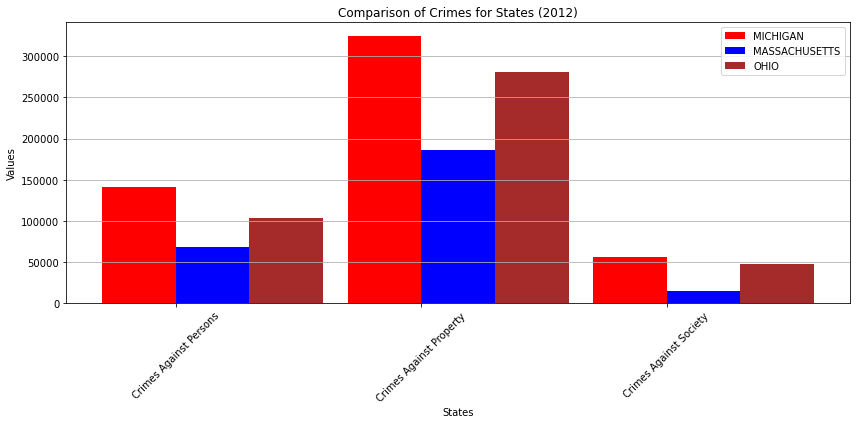

In [87]:

states = ["MICHIGAN","MASSACHUSETTS","OHIO"]
filtered_df = std[std['State'].isin(states)]

# Extract column names for comparison (excluding 'State' and 'Population' columns)
columns_to_compare = filtered_df.columns[3:]  

# Define custom colors for the bars
colors = ['red', 'blue','brown']

# Create a grouped bar chart for comparing Turkey and Azerbaijan
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.30
index = np.arange(len(columns_to_compare))

for i, state in enumerate(states):
    values = filtered_df[filtered_df['State'] == state][columns_to_compare].values[0]
    plt.bar(index + i * bar_width, values, bar_width, label=state , color=colors[i])

    
    
plt.xlabel('States')
plt.ylabel('Values')
plt.title('Comparison of Crimes for States (2012)')
plt.xticks(index + bar_width / 2, columns_to_compare, rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

 #  Population - Crimes Against Persons

Text(0.5, 1.0, 'Population - Crimes Against Persons')

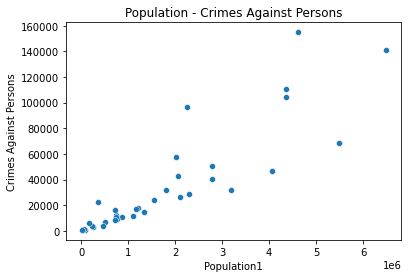

In [90]:
sns.scatterplot(x =std["Population1"],y = std["Crimes Against Persons"])
plt.title("Population - Crimes Against Persons")

#  Population - Crimes Against Property

Text(0.5, 1.0, 'Population - Crimes Against Property')

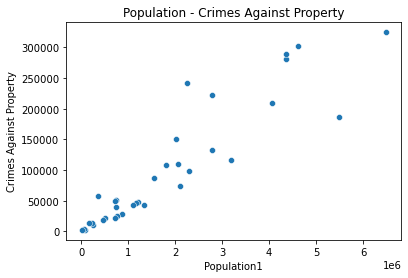

In [91]:
sns.scatterplot(x =std["Population1"],y = std["Crimes Against Property"])
plt.title("Population - Crimes Against Property")

# Population - Crimes Against Society

Text(0.5, 1.0, 'Population - Crimes Against Society')

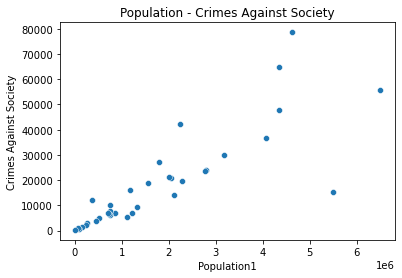

In [92]:
sns.scatterplot(x =std["Population1"],y = std["Crimes Against Society"])
plt.title("Population - Crimes Against Society")

# Heatmap

<AxesSubplot:>

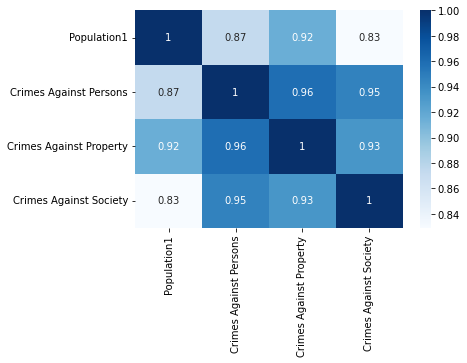

In [102]:
heatmp = std.corr()
sns.heatmap(heatmp , annot=True, cmap='Blues')

# lmplot

In [118]:
new_state =  ['MICHIGAN', 'MASSACHUSETTS', 'OHIO']


pplt = df[df['State'].isin(new_state)]

pplt = pplt.reset_index(drop=True)



<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

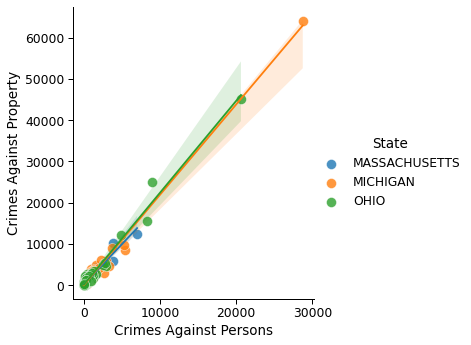

In [121]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

plt.figure(figsize=(8,6))


sns.lmplot(x='Crimes Against Persons', y='Crimes Against Property', hue='State', data=pplt, 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})

# 

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

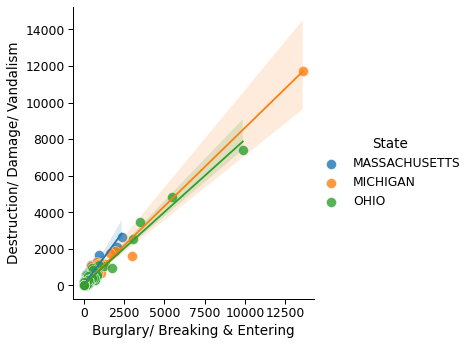

In [122]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

plt.figure(figsize=(8,6))

sns.lmplot(x='Burglary/ Breaking & Entering', y='Destruction/ Damage/ Vandalism', hue='State', data=pplt, 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})